In [1]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print('Tensorflow version:',tf.__version__,sep=' ')
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense,AveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Tensorflow version: 2.2.0


In [2]:
import os
print(os.listdir('short'))

['train', 'test', 'Train.csv', 'Test.csv']


In [3]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]
height = 32
width =32
channels = 3
num_classes = 43
n_inputs = height * width*channels
for i in range(num_classes) :
    s="images/train/{0}/".format(i)
    print(s)
    imageset=os.listdir(s)
    for imgs  in imageset:
        image=cv2.imread(s+imgs)
        i_array = Image.fromarray(image, 'RGB')
        size = i_array.resize((height, width))
        data.append(np.array(size))
        labels.append(i)

images/train/0/
images/train/1/
images/train/2/
images/train/3/
images/train/4/
images/train/5/
images/train/6/
images/train/7/
images/train/8/
images/train/9/
images/train/10/
images/train/11/
images/train/12/
images/train/13/
images/train/14/
images/train/15/
images/train/16/
images/train/17/
images/train/18/
images/train/19/
images/train/20/
images/train/21/
images/train/22/
images/train/23/
images/train/24/
images/train/25/
images/train/26/
images/train/27/
images/train/28/
images/train/29/
images/train/30/
images/train/31/
images/train/32/
images/train/33/
images/train/34/
images/train/35/
images/train/36/
images/train/37/
images/train/38/
images/train/39/
images/train/40/
images/train/41/
images/train/42/


In [4]:
x_train=np.array(data)
x_train= x_train/255.0
y_train=np.array(labels)
y_train=keras.utils.to_categorical(y_train,num_classes)

In [5]:
# Spli|t Data
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size = 0.15,random_state=0)
print("Train :", X_train.shape)
print("Test :", X_test.shape)

Train : (33327, 32, 32, 3)
Test : (5882, 32, 32, 3)


Train image


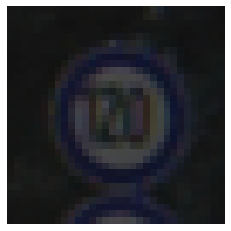

Size of this image is (32, 32, 3)


In [6]:
# Show images
import matplotlib.pyplot as plt

def display_images(image, label):
        plt.axis('off')
        plt.imshow(image)
        plt.show()       
        print("Size of this image is " + str(image.shape))
#         print("Class of the image is " + str(labels))

print("Train image")
display_images(X_train[2], Y_train[2])

In [7]:
model = keras.Sequential()

model.add(Conv2D(16, kernel_size=(5,5), padding='same', activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          5

In [8]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train Model
epochs =15
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=64, epochs=epochs)

Epoch 1/15
521/521 [==============================] - 49s 94ms/step - loss: 1.9756 - accuracy: 0.4320 - val_loss: 0.5675 - val_accuracy: 0.8487
Epoch 2/15
521/521 [==============================] - 50s 97ms/step - loss: 0.5018 - accuracy: 0.8390 - val_loss: 0.1489 - val_accuracy: 0.9611
Epoch 3/15
521/521 [==============================] - 49s 95ms/step - loss: 0.2598 - accuracy: 0.9159 - val_loss: 0.0929 - val_accuracy: 0.9765
Epoch 4/15
521/521 [==============================] - 49s 94ms/step - loss: 0.1720 - accuracy: 0.9454 - val_loss: 0.0602 - val_accuracy: 0.9852
Epoch 5/15
521/521 [==============================] - 49s 94ms/step - loss: 0.1368 - accuracy: 0.9566 - val_loss: 0.0387 - val_accuracy: 0.9896
Epoch 6/15
521/521 [==============================] - 50s 95ms/step - loss: 0.1073 - accuracy: 0.9649 - val_loss: 0.0294 - val_accuracy: 0.9923
Epoch 7/15
521/521 [==============================] - 49s 95ms/step - loss: 0.0940 - accuracy: 0.9695 - val_loss: 0.0272 - val_accuracy:

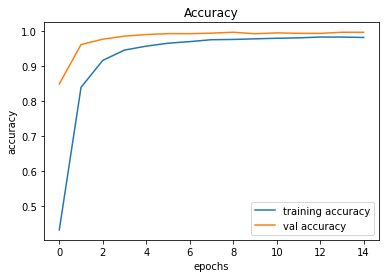

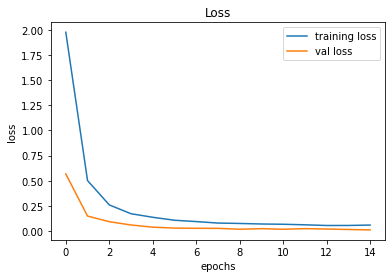

In [12]:
import matplotlib.pyplot as plt
from keras import models

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [13]:
# Predicting Test data 
y_test=pd.read_csv("images/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('images/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

print(len(data))
X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = np.argmax(model.predict(X_test), axis=-1)

12630


In [14]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, pred)
print('Accuracy ',acc*100.00)
from sklearn.metrics import precision_score
pre=precision_score(y_test, pred, average='weighted')
print('Precision ',pre*100)
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred, average='weighted')
print('F1 score ',f1*100)

Accuracy  95.51068883610452
Precision  95.81808925889578
F1 score  95.48018713714704


In [15]:
signs=[
    "Speed limit 20",
    "Speed limit 30",
    "Speed limit 50",
    "Speed limit 60",
    "Speed limit 70",
    "Speed limit 80",
    "Speed limit 90",
    "Speed limit 100",
    "Speed limit 120",
    "No passing",
    "No passing for vechiles over 3.5 metric tons",
    "Right-of-way at the next intersection",
    "Priority road",
    "Yield",
    "Stop",
    "No vehicles",
    "Vehicles over 3.5 metric tons prohibited",
    "No entry",
    "General caution",
    "Dangerous curve to the left",
    "Dangerous curve to the right",
    "Double curve",
    "Bumpy road",
    "Slippery road",
    "Road narrows on the right",
    "Road work",
    "Traffic signals",
    "Pedestrians",
    "Children crossing",
    "Bicycles crossing",
    "Beware of ice/snow",
    "Wild animals crossing",
    "End of all speed and passing limits",
    "Turn right ahead",
    "Turn left ahead",
    "Ahead only",
    "Go straight or right",
    "Go straight or left",
    "Keep right",
    "Keep left",
    "Roundabout mandatory",
    "End of no passing",
    "End of no passing by vechiles over 3.5 metric tons"
]

The sign says :Speed limit 120


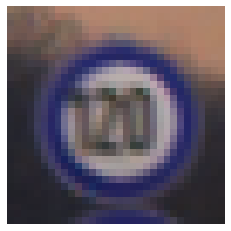

Size of this image is (32, 32, 3)
Model predicted :Speed limit 120


In [16]:
rn=int(random.random()*len(X_test))
print("The sign says ",signs[y_test[rn]],sep=':')
display_images(X_test[rn],y_test[rn])
print("Model predicted ",signs[pred[rn]],sep=':')